# Applying Machine Learning Models

In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from datetime import datetime

from sklearn import linear_model
# metrics: 計測 → 評価
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
# カーネルなしSVM（SVC: Support Vector Classifierの略）
from sklearn.svm import LinearSVC
# カーネル法を用いたSVM
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
# epsilons = [0.001, 0.05, 0.7, 0.8, 0.9, 1.6, 1.7, 1.8]
epsilons = [0.005, 0.01, 0.1, 0.5, 1.0, 1.2, 1.4, 1.5, 1.9, 2.0, 2.5]

In [3]:
data1 = pd.read_csv('Data_UCI_not_noise_1.csv')
data2 = pd.read_csv('Data_UCI_not_noise_2.csv')

df_concat = pd.concat([data1, data2])

print(df_concat.shape)

(9233, 642)


In [4]:
labels_act = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']

labels_uid = list()
for i in range(1, 31):
    labels_uid.append(i)

In [5]:
from sklearn.model_selection import train_test_split

def split_train_test_data(df, id):
  X = df.drop(['user_Id', 'activity_Id'], axis=1)
  y = df[id]

  return train_test_split(X, y, test_size=0.33, random_state=42) # X_train, X_test, y_train, y_test

  # for i in X_train.columns:
  #   print(X_train[i].dtype)
  # print(X_train.dtypes)

  # # 訓練用
  # X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
  # y_train = train['subject']

  # # テスト用
  # X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
  # y_test = test['subject']

  # print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
  # print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

Let's make a function to plot the confusion matrix

In [6]:
plt.rcParams['font.family'] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    
    # normalize → 正規化
    if normalize:
        # cmの値は予測結果と実際の値の一致数なので，それを列の合計で割ると確率
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # np.newaxisは次元を追加
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        # plt.text(): 座標（x, y），表示するテキスト，文字位置，色指定
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Let's make a function to run any model specified

In [7]:
# 任意のモデルを実行
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_nomalize=True, print_cm=True, cm_cmap=plt.cm.Greens):
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model...')
    model.fit(X_train, y_train)
    print('Done')
    train_end_time = datetime.now()
    results['training_time'] = train_end_time - train_start_time
    print('==> training time:- {}\n'.format(results['training_time']))
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    results['testing_time'] = test_end_time - test_start_time
    print('==> testing time:- {}\n'.format(results['testing_time']))
    # 予測結果を格納
    results['predicted'] = y_pred
    
    # calculate overall accuracy of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('==> Accuracy:- {}\n'.format(accuracy))
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    # output confusion matrix
    if print_cm:
        print('\n ********Confusion Matrix********')
        print('\n {}'.format(cm))
    
    # plot confusion matrix
    plt.figure(figsize=(6, 6))
    plt.grid(b=False) # グリッドを非表示
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized Confusion Matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('****************| Classifiction Report |****************')
    classification_report = metrics.classification_report(y_test, y_pred)
    
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained model to the results
    results['model'] = model
    
    return results
    

In [8]:
# 任意のモデルを実行
def perform_model_epsilon(model, X_train, y_train, X_test, y_test, class_labels, cm_nomalize=True, print_cm=True, cm_cmap=plt.cm.Greens):
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model...')
    model.fit(X_train, y_train)
    print('Done')
    train_end_time = datetime.now()
    results['training_time'] = train_end_time - train_start_time
    print('==> training time:- {}\n'.format(results['training_time']))
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    results['testing_time'] = test_end_time - test_start_time
    print('==> testing time:- {}\n'.format(results['testing_time']))
    # 予測結果を格納
    results['predicted'] = y_pred
    
    # calculate overall accuracy of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('==> Accuracy:- {}\n'.format(accuracy))
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    # output confusion matrix
    if print_cm:
        print('\n ********Confusion Matrix********')
        print('\n {}'.format(cm))
    
    # plot confusion matrix
    plt.figure(figsize=(15, 15))
    plt.grid(b=False) # グリッドを非表示
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized Confusion Matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    # print('****************| Classifiction Report |****************')
    # classification_report = metrics.classification_report(y_test, y_pred)
    
    # # store report in results
    # results['classification_report'] = classification_report
    # print(classification_report)
    
    # get f1 score
    f1 = metrics.f1_score(y_test, y_pred, average="macro")
    print("\n F1 Score:{}".format(f1))
    
    # add the trained model to the results
    results['model'] = model
    
    return results, f1
    

Make function to print the gridsearch Parameters

In [9]:
# 同一モデルでの値を表示
def print_grid_search_attributes(model):
    
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('\n\n==> Best Estimator:')
    print('\t{}\n'.format(model.best_estimator_))
    
    # parameters that gave best results while perfoming grid search
    print('\n==> Best parameters:')
    print('\tParameters of best estimator : {}'.format(model.best_params_))
    
    # number of cross validation splits
    print('\n==> No. of CrossValidation sets:')
    print('\tTotal nmber of cross validation sets: {}'.format(model.n_splits_))
    
    # Average cross validated score of the best estimator, from the Grid Search
    print('\n==> Best Score:')
    print('\tAverage Cross Validate scores of Best estimator : {}'.format(model.best_score_))

## 5. Random Forest Classifier with GridSearch

epsilon: 2.1
training the model...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Done
==> training time:- 0:08:40.962726

Predicting test data
==> testing time:- 0:00:00.130509

==> Accuracy:- 0.13193304890055793


 ********Confusion Matrix********

 [[42  1  0  0  2  0  0  0  0  1  2  0  0  2  1  6  2  2  0  3  7  0  2  6
   9 10  6  1  9  6]
 [ 9  4  1  1  0  1  1  0  0  1  0  1  2  1  2  7  5  5  1  2  9  3  2 13
   3  7 13  2  7  0]
 [ 5  3  2  0  0  1  0  0  0  0  1  2  1  0  3  0  8  8  0  0  5  2  0 16
  16 10  7  1  1  3]
 [ 1  0  1  2  1  0  1  0  0  0  0  0  2  0  1  0  6  8  1  0  4  3  0 13
  18 17  3  0  6  4]
 [ 6  1  0  2  8  0  1  0  0  2  1  1  1  0  3  2  4  5  0  0  7  0  0  8
  11 15  4  1  4  2]
 [10  0  1  1  6  4  0  0  0  2  0  1  1  0  1  2  7  4  2  4  4  1  5 10
   5 11  0  0  2  4]
 [ 4  1  0  0  0  0  6  1  0  1  1  1  0  0  0  3  5  9  1  0  6  0  4 12
   8 11  2  2  2  3]
 [ 8  1  0  1  0  0  0  1  0  0  0  0  0  8  1  4  0  2  0  3  3  1 

/var/folders/st/dmkj3b756jq20y6qwzjf_twc0000gn/T/ipykernel_7531/1524874641.py:42: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False) # グリッドを非表示


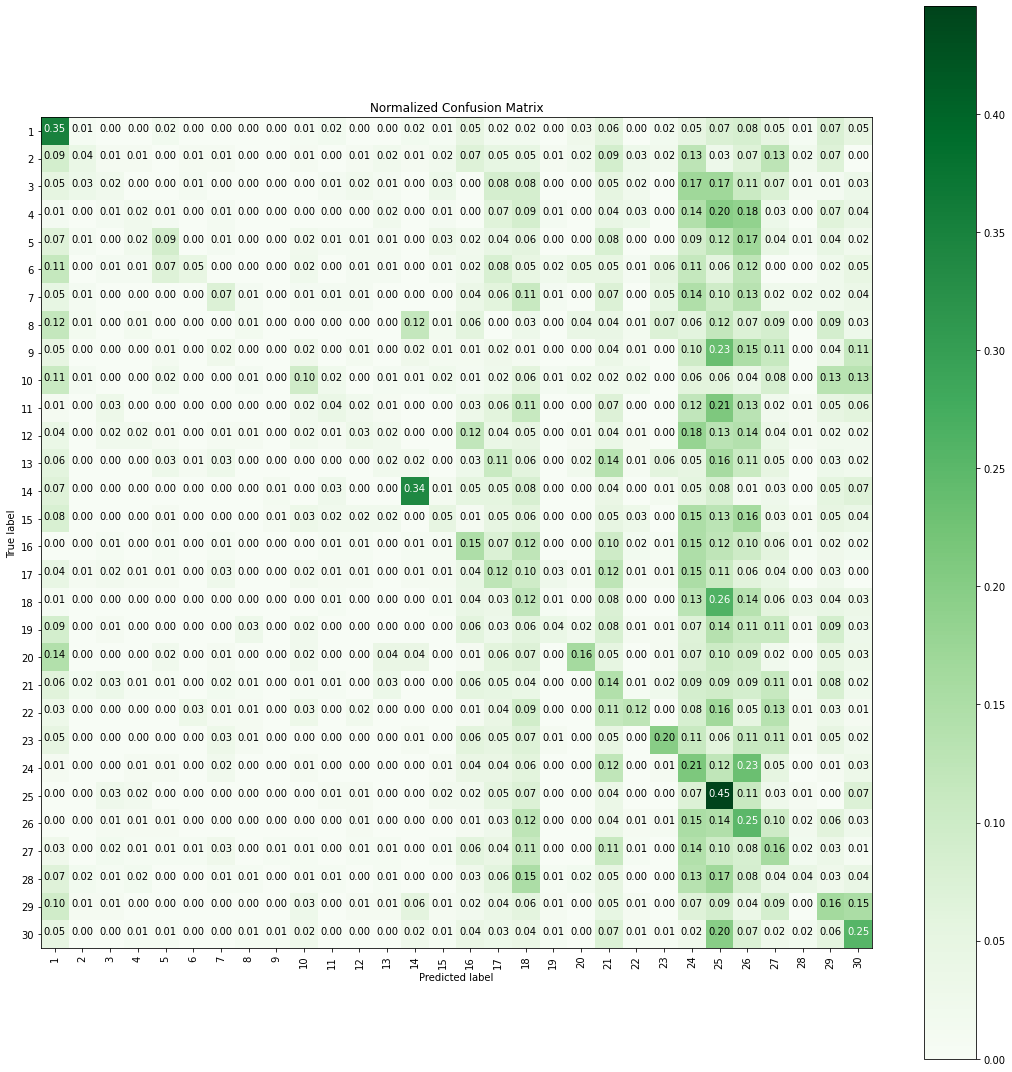


 F1 Score:0.1198457940825279


==> Best Estimator:
	RandomForestClassifier(max_depth=14, n_estimators=200)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 14, 'n_estimators': 200}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.13546871306498734


ValueError: x and y must have same first dimension, but have shapes (11,) and (1,)

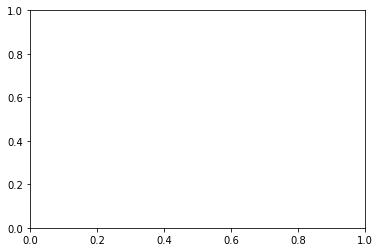

In [24]:
f1_array_random_uid = []
acc_array_random_uid = []

params = {'n_estimators': np.arange(150,201,10), 'max_depth':np.arange(6,15,2)}

for epsilon in epsilons:
  print("epsilon: "+ str(epsilon))
  X_train, X_test, y_train, y_test = split_train_test_data(df_concat, 'user_Id')

  for col in X_train:
    # default sensitivity = 1.0
    # print("------epsilon--------")
    X_train[col] = X_train[col].apply(lambda x: x + np.random.laplace(0, 1.0/epsilon))
    X_test[col] = X_test[col].apply(lambda x: x + np.random.laplace(0, 1.0/epsilon))

  rfc = RandomForestClassifier()
  rfc_grid = GridSearchCV(rfc, param_grid=params, cv=5, verbose=1, n_jobs=-1)
  rfc_grid_results, f1 = perform_model_epsilon(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels_uid)

  f1_array_random_uid.append(f1)
  acc_array_random_uid.append(rfc_grid_results['accuracy'])

  # observe the attributes of the model 
  print_grid_search_attributes(rfc_grid_results['model'])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(epsilons, f1_array_random_uid, label='Random Forest Classifier in Noise')
ax.set_xlabel('epsilon')
ax.set_ylabel('f1_score')
plt.legend(loc='best')
plt.show()



training the model...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Done
==> training time:- 0:06:20.875421

Predicting test data
==> testing time:- 0:00:00.095892

==> Accuracy:- 0.8703642927469643


 ********Confusion Matrix********

 [[ 96   0   1   0   0   0   0   0   1   0   0   0   0   0   5   0   1   1
    2   0   0   0   0   0   1   4   0   0   3   5]
 [  0  87   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    7   0   2   0   0   2   0   2   0   0   3   0]
 [  0   0  84   4   0   0   0   0   1   0   0   0   0   0   0   0   0   0
    3   0   0   0   0   2   0   0   0   0   1   0]
 [  0   0   0  88   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    2   0   0   0   0   1   1   0   0   0   0   0]
 [  0   0   0  16  63   0   0   0   0   0   0   0   0   0   0   0   0   0
    5   0   1   0   1   2   1   0   0   0   0   0]
 [  0   1   0   3   0  75   2   0   0   0   0   1   0   0   1   0   0   1
    2   1   0   0   1   0   0   0   0   0   0   

/var/folders/st/dmkj3b756jq20y6qwzjf_twc0000gn/T/ipykernel_7531/1524874641.py:42: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False) # グリッドを非表示


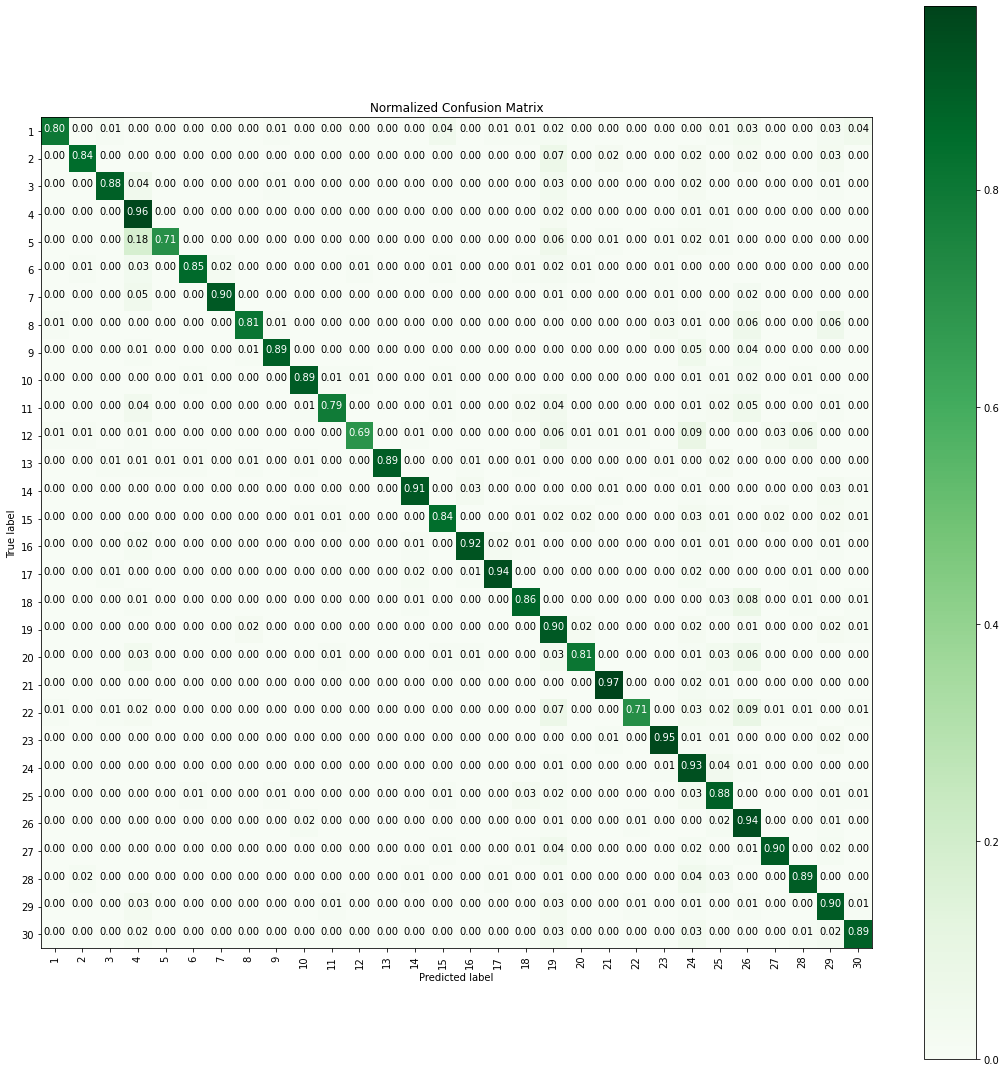


 F1 Score:0.8730050085668374


==> Best Estimator:
	RandomForestClassifier(max_depth=14, n_estimators=200)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 14, 'n_estimators': 200}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.8627533129686054
[0.016078821420224945, 0.019612886134853402, 0.01544941516876563, 0.01703862285160214, 0.02972929366490172, 0.044655362892578876, 0.04858042772409847, 0.048591915117931817, 0.09335382032063438, 0.11322515200670219, 0.15925545972823124, 0.8730050085668374]


In [12]:
params = {'n_estimators': np.arange(150,201,10), 'max_depth':np.arange(6,15,2)}

X_train, X_test, y_train, y_test = split_train_test_data(df_concat, 'user_Id')

rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, cv=5, verbose=1, n_jobs=-1)
rfc_grid_results, f1 = perform_model_epsilon(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels_uid)

f1_array_random_uid.append(f1)
acc_array_random_uid.append(rfc_grid_results['accuracy'])

# observe the attributes of the model 
print_grid_search_attributes(rfc_grid_results['model'])

print(f1_array_random_uid)


epsilon: 2.1
training the model...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Done
==> training time:- 0:03:22.118912

Predicting test data
==> testing time:- 0:00:00.108357

==> Accuracy:- 0.7689530685920578


 ********Confusion Matrix********

 [[472  32  36   0   1   0]
 [138 315  38   0   1   0]
 [ 81  45 302   0   0   0]
 [  0   0   0 231 249  26]
 [  0   0   0  53 477   3]
 [  0   0   0   1   0 546]]


/var/folders/st/dmkj3b756jq20y6qwzjf_twc0000gn/T/ipykernel_7531/1524874641.py:42: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False) # グリッドを非表示


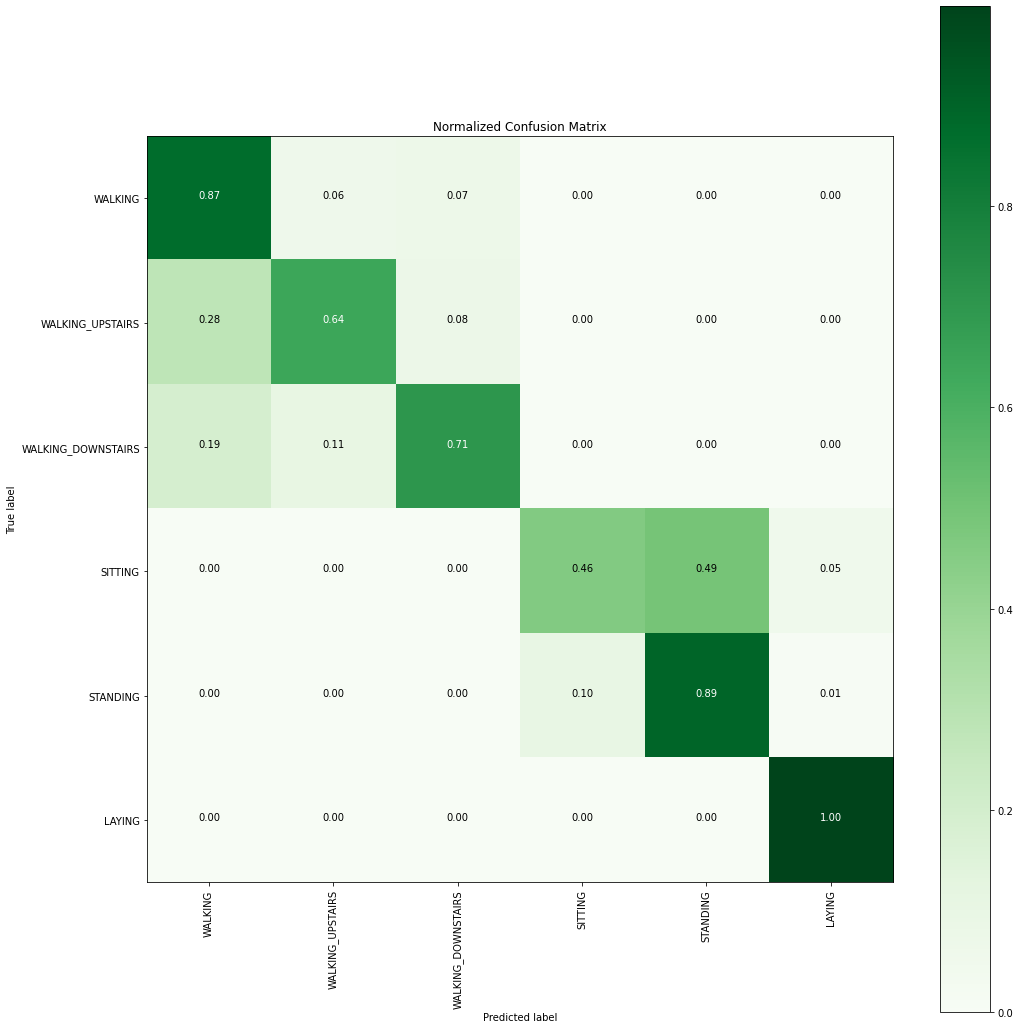


 F1 Score:0.7573370809629116


==> Best Estimator:
	RandomForestClassifier(max_depth=10, n_estimators=180)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 10, 'n_estimators': 180}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.7772394779699179


ValueError: x and y must have same first dimension, but have shapes (11,) and (1,)

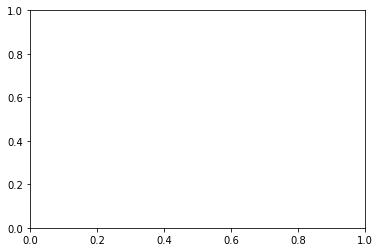

In [23]:
f1_array_random_act = []
acc_array_random_act = []

params = {'n_estimators': np.arange(150,181,10), 'max_depth':np.arange(6,15,2)}

for epsilon in epsilons:
  print("epsilon: "+ str(epsilon))
  X_train, X_test, y_train, y_test = split_train_test_data(df_concat, 'activity_Id')

  for col in X_train:
    # default sensitivity = 1.0
    # print("------epsilon--------")
    X_train[col] = X_train[col].apply(lambda x: x + np.random.laplace(0, 1.0/epsilon))
    X_test[col] = X_test[col].apply(lambda x: x + np.random.laplace(0, 1.0/epsilon))

  rfc = RandomForestClassifier()
  rfc_grid = GridSearchCV(rfc, param_grid=params, cv=5, verbose=1, n_jobs=-1)
  rfc_grid_results, f1 = perform_model_epsilon(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels_act)

  f1_array_random_act.append(f1)
  acc_array_random_act.append(rfc_grid_results['accuracy'])

  # observe the attributes of the model 
  print_grid_search_attributes(rfc_grid_results['model'])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(epsilons, f1_array_random_act, label='Random Forest Classifier in Noise')
ax.set_xlabel('epsilon')
ax.set_ylabel('f1_score')
plt.legend(loc='best')
plt.show()


training the model...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Done
==> training time:- 0:17:59.673280

Predicting test data
==> testing time:- 0:00:00.052396

==> Accuracy:- 0.979980308500164


 ********Confusion Matrix********

 [[535   0   6   0   0   0]
 [  0 488   4   0   0   0]
 [  2   3 423   0   0   0]
 [  0   0   0 483  23   0]
 [  0   0   0  23 510   0]
 [  0   0   0   0   0 547]]


/var/folders/st/dmkj3b756jq20y6qwzjf_twc0000gn/T/ipykernel_7531/1524874641.py:42: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False) # グリッドを非表示


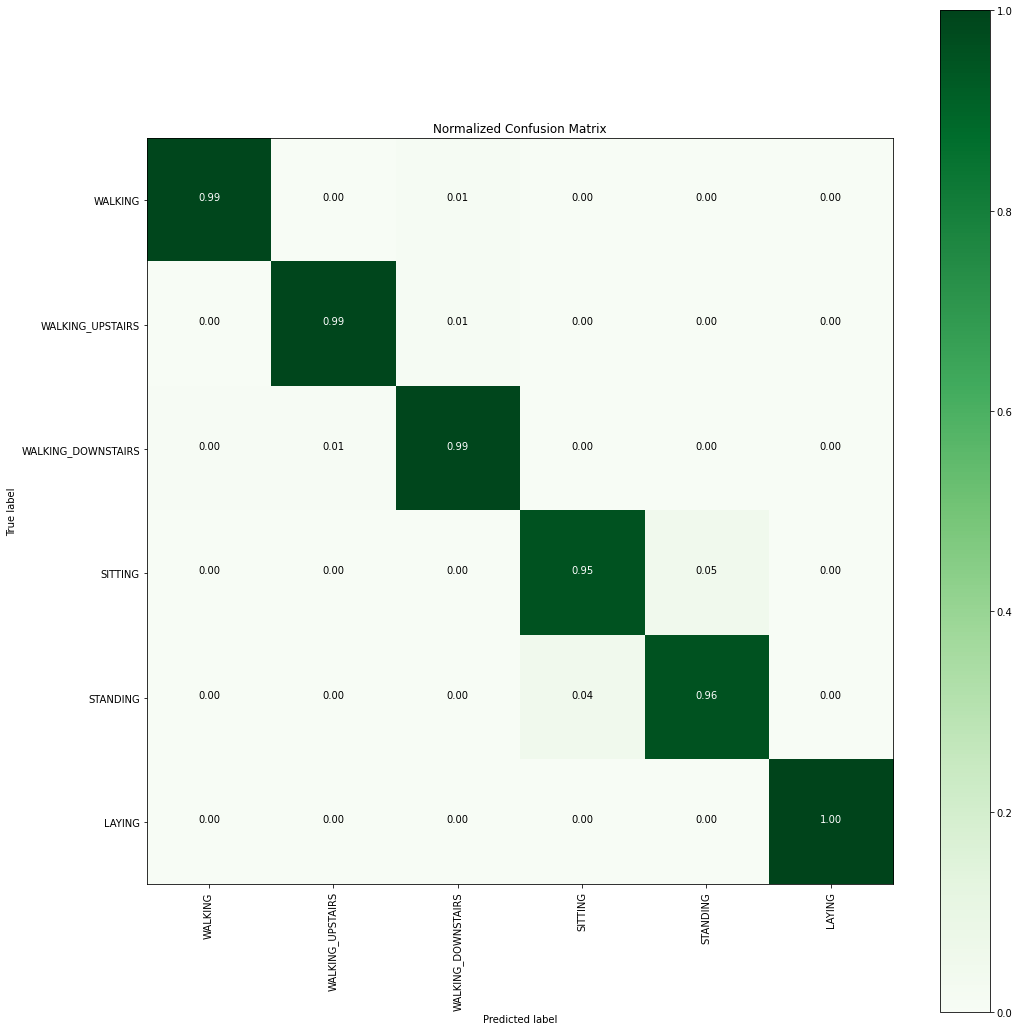


 F1 Score:0.9799049455854515


==> Best Estimator:
	RandomForestClassifier(max_depth=14, n_estimators=180)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 14, 'n_estimators': 180}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.9814105469091803
[0.11906123620041471, 0.10863886055679961, 0.13591734290481272, 0.37231956781370124, 0.5684197536939151, 0.6171633091606842, 0.6347528209901533, 0.6740345417927841, 0.7276941177005075, 0.7471082737460781, 0.7854649863936237, 0.9799049455854515]


In [15]:
params = {'n_estimators': np.arange(150,201,10), 'max_depth':np.arange(6,15,2)}

X_train, X_test, y_train, y_test = split_train_test_data(df_concat, 'activity_Id')

rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, cv=5, verbose=1, n_jobs=-1)
rfc_grid_results, f1 = perform_model_epsilon(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels_act)

f1_array_random_act.append(f1)
acc_array_random_act.append(rfc_grid_results['accuracy'])

# observe the attributes of the model 
print_grid_search_attributes(rfc_grid_results['model'])


print(f1_array_random_act)


In [16]:
# epsilons = [0.005, 0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 2.5, no]
# epsilons = [0.005, 0.01, 0.1, 0.5, 1.0, 1.2, 1.4, 1.5, 1.9, 2.0, 2.5, no]
print(f1_array_random_act)
print(f1_array_random_uid)
print(acc_array_random_act)
print(acc_array_random_uid)

[0.11906123620041471, 0.10863886055679961, 0.13591734290481272, 0.37231956781370124, 0.5684197536939151, 0.6171633091606842, 0.6347528209901533, 0.6740345417927841, 0.7276941177005075, 0.7471082737460781, 0.7854649863936237, 0.9799049455854515]
[0.016078821420224945, 0.019612886134853402, 0.01544941516876563, 0.01703862285160214, 0.02972929366490172, 0.044655362892578876, 0.04858042772409847, 0.048591915117931817, 0.09335382032063438, 0.11322515200670219, 0.15925545972823124, 0.8730050085668374]
[0.16967509025270758, 0.16770594026911717, 0.2044634066294716, 0.44010502133245816, 0.6179849031834591, 0.6481785362651789, 0.6757466360354447, 0.6957663275352806, 0.7436823104693141, 0.7610764686576961, 0.794880210042665, 0.979980308500164]
[0.037742041352149654, 0.03741384968821792, 0.03380374138496882, 0.035116508040695764, 0.04496225795864785, 0.06399737446668854, 0.07318674105677715, 0.08007876599934362, 0.11224154906465376, 0.130620282244831, 0.16606498194945848, 0.8703642927469643]
